In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 200,  # to adjust notebook inline plot size
    'savefig.dpi': 200,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.5, 2.625], # 4 x 3
#     'figure.figsize': [4*1.125, 3*1.125], # 4x3, full slide in keynote
    'font.family': 'serif',
    'figure.max_open_warning':100
}
mpl.rcParams.update(params)

## Get physical constants from Scipy
import scipy.constants as con
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
# k = con.physical_constants['Boltzmann constant in eV/K'][0]

import scipy.integrate as int

import scipy.io as sio

import scipy.optimize as opt

import scipy.special as spl

In [3]:
misloc_pack_path = os.path.join(
    os.path.sep,
    'Users',
    'chair',
    'Documents',
    'Academia',
    'SuperRes',
    'Biteen_colab',
    'Mispolarization',
    'python',
#     'gitted',
    )

sys.path.append(misloc_pack_path)

import misloc_mispol_package as mmp
import misloc_mispol_package.calc.coupled_dipoles as cp
import misloc_mispol_package.optics.anal_foc_diff_fields as aff

In [4]:
import twosphere_temperature as tst
import pti_model as pti

In [5]:
# mol_angle=0,
# plas_angle=0,
# d_col=-d_col_cm,
# p0_position=-d_col_cm/2,
# beam_x_positions=obs_points,
# E_d_angle=0,
# drive_hbar_w=anti_enei,
# alpha0_diag=alpha_1_of_hw(anti_enei),
# alpha1_diag=alpha_2_of_hw(anti_enei),
# n_b=eps_back**0.5,
# drive_amp=Eplane,
# return_polarizabilities=False,

In [6]:
x = np.linspace(-500, 500, 100)*1e-7
X, Y = np.meshgrid(x, x)

field = aff.E_field(
    dipole_orientation_angle=0,
    xi=X,
    y=Y,
    k=2.4/hbar/c
    ).T

In [26]:
field.shape

(100, 100, 3)

In [47]:
intensity = (c/8*np.pi) * np.sum(field*np.conj(field), axis=-1)

area_image = (x.max() - x.min())**2. 
num_pixels = len(x)**2.
area_per_pixel = area_image / num_pixels
power = np.sum(intensity) * area_per_pixel
power

1.6041512006547537e+31

In [48]:
area_per_pixel

9.999999999999998e-13

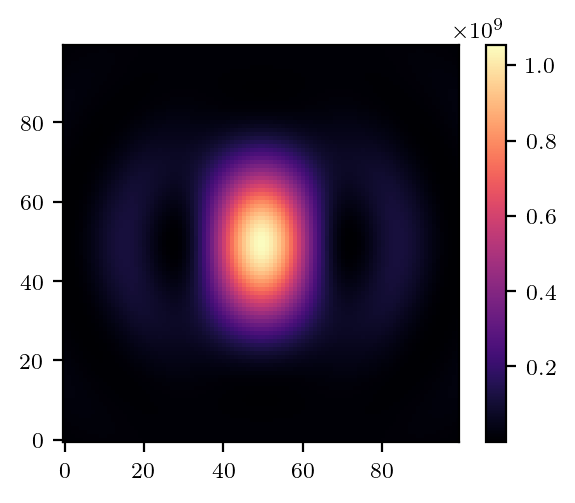

In [49]:
plt.imshow(intensity/(power))
plt.colorbar()

In [50]:
np.sum(intensity)

1.604151200654754e+43

In [51]:
power

1.6041512006547537e+31

In [52]:
np.sum(intensity)/(power/area_per_pixel)

1.0

In [61]:
P_0 = 0.0002
lambda_in = .780
NA = 1.25
dip_space = 1
waist = lambda_in * 10**3 * 0.6 / (NA * dip_space)
waist

374.4

In [60]:
I_0 = float(P_0) / ( np.pi * (waist * (dip_space) * 10**-9)**2 )*10**-9 #units of nW/m^2, then will get converted to W/m^2 for var.par
print(I_0)
I_0 = "{:.4E}".format(I_0)
print(I_0)

0.45415954156820526
4.5416E-01


In [62]:
str = ("I_0: %re+9\n" % float(I_0))
print(str)

I_0: 0.45416e+9

